In [1]:
%%html
<style>
table {align:left;display:block}
</style>

In [2]:
from papyrus_scripts.download import download_papyrus


In [3]:
download_papyrus(version='latest', structures=True, descriptors=['mold2', 'unirep'])

Latest version: 05.7
########## DISCLAIMER ##########
You are downloading the high-quality Papyrus++ dataset.
Should you want to access the entire, though of lower quality, Papyrus dataset,
look into additional switches of this command.
################################
Number of files to be downloaded: 7
Total size: 2.26GB


In [4]:
from papyrus_scripts.reader import read_papyrus, read_protein_set

In [5]:
from papyrus_scripts.preprocess import (keep_quality, keep_source, keep_type,
                                        keep_organism, keep_accession, keep_protein_class,
                                        keep_match, keep_contains
                                       )

In [6]:
protein_data = read_protein_set(source_path=None)
protein_data.head()

,target_id,UniProtID,Status,Organism,Classification,Length,Sequence,TID
0,P47747_WT,HRH2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,359,MAFNGTVPSFCMDFTVYKVTISVILIILILVTVAGNVVVCLAVGLN...,ChEMBL:CHEMBL2882
1,B0FL73_WT,B0FL73_CAVPO,unreviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,467,MGAGVLALGASEPCNLSSTAPLPDGAATAARLLVPASPPASLLPPT...,ChEMBL:CHEMBL5471
2,Q8K4Z4_WT,ADRB2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,418,MGHLGNGSDFLLAPNASHAPDHNVTRERDEAWVVGMAIVMSLIVLA...,ChEMBL:CHEMBL5414
3,P97266_WT,OPRM_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,98,YTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCK...,ChEMBL:CHEMBL4354;ChEMBL:CHEMBL2111465
4,P41144_WT,OPRK_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,380,MGRRRQGPAQPASELPARNACLLPNGSAWLPGWAEPDGNGSAGPQD...,ChEMBL:CHEMBL3952;ChEMBL:CHEMBL2111465


In [7]:
sample_data = read_papyrus(is3d=False, plusplus= True, source_path='/home/s2861704/ppk/papyrus_data')
protein_data = read_protein_set(source_path=None)

In [8]:
filter1_it = keep_quality(data=sample_data, min_quality='high')
filter2_it = keep_protein_class(data=filter1_it, protein_data=protein_data, classes=[{'l4': 'Atypical protein kinase group'}])
# filter3_it = keep_type(data=filter2_it, activity_types=['Ki', 'KD'])
filter4_it = keep_organism(data=filter2_it, protein_data=protein_data, organism=['Human'], generic_regex=True)
filter5_it = keep_source(data=filter4_it, source=['ChEMBL34', 'Sharma2016'])
#filter6_it = keep_source(data=filter4_it, source=['Christmann2016'])

In [9]:
## protein classes:
# l2: Kinase
# l3: Protein Kinase
# l4: [CMGC / AGC / Other / STE / CAMK / TK / Atypical / TKL / CK1] protein kinase group
# l5: family
# l6: subfamily
# LINK: https://static-content.springer.com/esm/art%3A10.1186%2Fs13321-022-00672-x/MediaObjects/13321_2022_672_MOESM3_ESM.html

In [10]:
sample_data.head()
protein_data.head()

,target_id,UniProtID,Status,Organism,Classification,Length,Sequence,TID
0,P47747_WT,HRH2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,359,MAFNGTVPSFCMDFTVYKVTISVILIILILVTVAGNVVVCLAVGLN...,ChEMBL:CHEMBL2882
1,B0FL73_WT,B0FL73_CAVPO,unreviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,467,MGAGVLALGASEPCNLSSTAPLPDGAATAARLLVPASPPASLLPPT...,ChEMBL:CHEMBL5471
2,Q8K4Z4_WT,ADRB2_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,418,MGHLGNGSDFLLAPNASHAPDHNVTRERDEAWVVGMAIVMSLIVLA...,ChEMBL:CHEMBL5414
3,P97266_WT,OPRM_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,98,YTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCK...,ChEMBL:CHEMBL4354;ChEMBL:CHEMBL2111465
4,P41144_WT,OPRK_CAVPO,reviewed,Cavia porcellus (Guinea pig),Membrane receptor->Family A G protein-coupled ...,380,MGRRRQGPAQPASELPARNACLLPNGSAWLPGWAEPDGNGSAGPQD...,ChEMBL:CHEMBL3952;ChEMBL:CHEMBL2111465


In [11]:
#from papyrus_scripts.preprocess import consume_chunks

In [12]:
#filtered_data = consume_chunks(filter4_it, progress=True, total=60)
filtered_data = filter5_it

In [13]:
print(f'Number of activity points: {filtered_data.shape[0]}')

Number of activity points: 3906


In [14]:
# ACTIVITY POINTS HIGH QUALITY
# CMGC: 25017
# AGC: 8367
# STE: 3156
# CAMK: 4852
# TK: 44032
# TKL: 6471
# CK1: 168
# Atypical: 3906
# Other: 6352
# Total: 102444

In [15]:
print(len(filtered_data['source']))
print(len(filtered_data['source'].unique()))
print(filtered_data.columns)
print(filtered_data['doc_id'])

3906
1
Index(['Activity_ID', 'Quality', 'source', 'CID', 'SMILES', 'connectivity',
       'InChIKey', 'InChI', 'InChI_AuxInfo', 'target_id', 'TID', 'accession',
       'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids', 'all_years',
       'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'type_other',
       'Activity_class', 'relation', 'pchembl_value', 'pchembl_value_Mean',
       'pchembl_value_StdDev', 'pchembl_value_SEM', 'pchembl_value_N',
       'pchembl_value_Median', 'pchembl_value_MAD', 'Classification',
       'Organism'],
      dtype='object')
0               PMID:19894727
3         DOI:10.1038/nbt1358
6               PMID:24433860
7               PMID:23855836
8               PMID:23855836
                ...          
4539       PATENT:US8772480B2
4540       PATENT:US9102670B2
4541            PMID:34046605
4547       PATENT:US8618111B2
4548    PATENT:WO2015040425A1
Name: doc_id, Length: 3906, dtype: object


In [16]:
#filtered_data['source'].unique()

In [17]:
print(len(filtered_data[filtered_data['source']=='Christmann2016']))
print(len(filtered_data[filtered_data['source']!='Christmann2016']))
print(len(filtered_data[filtered_data['source']=='ChEMBL34']))
print(len(filtered_data[filtered_data['source']=='Sharma2016']))
print(len(filtered_data))

0
3906
3906
0
3906


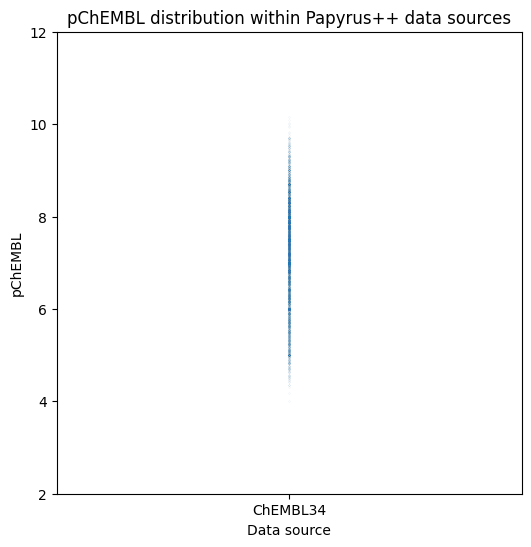

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data.plot(kind = 'scatter', x = 'source', y = 'pchembl_value_Mean', s=0.001, figsize=(6,6))
plt.ylim(2,12)
plt.xlabel('Data source')
plt.ylabel('pChEMBL')
plt.title('pChEMBL distribution within Papyrus++ data sources')
#plt.savefig('PapyrusKinDist-2301.png')
plt.show()

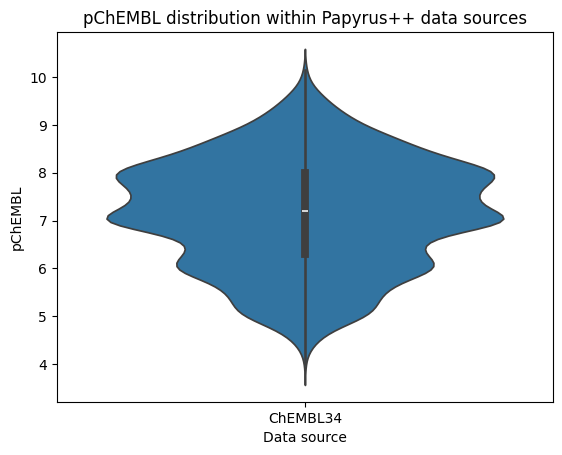

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load example dataset
dpdf = filtered_data

# create violin plot for height (horizontal)
sns.violinplot(data=dpdf, x="source", y="pchembl_value_Mean")
#plt.ylim(4,6)
plt.xlabel('Data source')
plt.ylabel('pChEMBL')
plt.title('pChEMBL distribution within Papyrus++ data sources')
#plt.savefig('PapyrusKinDist-CM2-violin-2301.png') 
plt.show()

In [21]:
filtered_data.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,Organism
0,AAHPRKDUIDQODH_on_P42345_WT,High,ChEMBL34,ChEMBL:CHEMBL1097899,CN1CCC(NC(=O)Nc2ccc(-c3nc(N4CCOCC4)c4cnn(C5CCN...,AAHPRKDUIDQODH,AAHPRKDUIDQODH-UHFFFAOYSA-N,InChI=1S/C34H43N9O2/c1-40-15-11-28(12-16-40)37...,"AuxInfo=1/1/N:1,35,34,36,33,37,12,42,11,43,4,4...",P42345_WT,...,=,6.9,6.900000,0.000000,0.000000,1.0,6.900,0.0,Enzyme->Kinase->Protein Kinase->Atypical prote...,Homo sapiens (Human)
3,AAKJLRGGTJKAMG_on_Q8NI60_WT,High,ChEMBL34,ChEMBL:CHEMBL553;Christmann2016.compound.50;Ch...,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,AAKJLRGGTJKAMG,AAKJLRGGTJKAMG-UHFFFAOYSA-N,InChI=1S/C22H23N3O4/c1-4-16-6-5-7-17(12-16)25-...,"AuxInfo=1/1/N:1,26,20,2,5,4,6,24,18,23,17,29,2...",Q8NI60_WT,...,=,5.72;5.721;5.721,5.720667,0.000577,0.000333,3.0,5.721,0.0,Enzyme->Kinase->Protein Kinase->Atypical prote...,Homo sapiens (Human)
6,AAMKUWYDJAVAKV_on_P42345_WT,High,ChEMBL34,ChEMBL:CHEMBL3112729,COc1ncc(-c2cc3c(C)nc(N)cc3n(C3CCCC3)c2=O)cc1NS...,AAMKUWYDJAVAKV,AAMKUWYDJAVAKV-UHFFFAOYSA-N,InChI=1S/C26H25F2N5O4S/c1-14-18-11-19(26(34)33...,"AuxInfo=1/1/N:11,1,20,21,19,22,33,32,25,36,8,1...",P42345_WT,...,=,7.47,7.470000,0.000000,0.000000,1.0,7.470,0.0,Enzyme->Kinase->Protein Kinase->Atypical prote...,Homo sapiens (Human)
7,AATCBLYHOUOCTO_on_P42345_WT,High,ChEMBL34,ChEMBL:CHEMBL1086377,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,AATCBLYHOUOCTO,AATCBLYHOUOCTO-UHFFFAOYSA-N,InChI=1S/C33H34N4O4S/c1-2-35-12-14-36(15-13-35...,"AuxInfo=1/1/N:1,2,37,36,17,38,16,18,35,13,12,4...",P42345_WT,...,=,5.0,5.000000,0.000000,0.000000,1.0,5.000,0.0,Enzyme->Kinase->Protein Kinase->Atypical prote...,Homo sapiens (Human)
8,AAUUQPVYBGHMCE_on_P78527_WT,High,ChEMBL34,ChEMBL:CHEMBL2420312,O=C(CN1CCCNCC1)Nc1ccc(-c2cccc3c(=O)cc(N4CCOCC4...,AAUUQPVYBGHMCE,AAUUQPVYBGHMCE-UHFFFAOYSA-N,InChI=1S/C32H32N4O4S/c37-26-19-29(36-15-17-39-...,"AuxInfo=1/1/N:38,37,18,6,39,17,19,36,14,13,7,9...",P78527_WT,...,=,7.66,7.660000,0.000000,0.000000,1.0,7.660,0.0,Enzyme->Kinase->Protein Kinase->Atypical prote...,Homo sapiens (Human)


In [20]:
backup = filtered_data
singletask_data = filtered_data
multitask_data = filtered_data

In [20]:
##REGRESSION MODEL

In [ ]:
from qsprpred.data import QSPRDataset
import os

os.makedirs("tutorial_output_splitdraft/data", exist_ok=True)

dataset_st = QSPRDataset(
    df=singletask_data,
    store_dir="tutorial_output_splitdraft/data",
    name="QuickStartDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42,
    overwrite=True
)

dataset_st.getDF()

In [ ]:
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data import RandomSplit

# Specifiy random split for creating the train (80%) and test set (20%)
rand_split = RandomSplit(test_fraction=0.2, dataset=dataset_st)
## Alt splits: ScaffoldSplit(/ter), TemporalSplit/StratisfiedSplitter, ManualSplit, BootstrapSplit,
## GMBTDataSplit: GBMTRandomSplit, ClusterSplit
# calculate compound features and split dataset into train and test
dataset_st.prepareDataset(
    split=rand_split,
    feature_calculators=[MorganFP(radius=3, nBits=2048)],
)

print(f"Number of samples in train set: {len(dataset_st.y)}")
print(f"Number of samples in test set: {len(dataset_st.y_ind)}")

dataset_st.save()

In [23]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs("tutorial_output_splitdraft/models", exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
stmodel = SklearnModel(
    base_dir="tutorial_output_splitdraft/models",
    alg=KNeighborsRegressor,
    name="QuickStartModel"
)

# We can now assess the model performance on the training set using cross validation
CrossValAssessor("r2")(stmodel, dataset_st)

# and on the test set
TestSetAssessor("r2")(stmodel, dataset_st)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
stmodel.fitDataset(dataset_st)

# We can optionally save the model and metadata to disk explicitly as well
_ = stmodel.save()

In [ ]:
from qsprpred.plotting.regression import CorrelationPlot

stplot = CorrelationPlot([stmodel])
axes, summary = stplot.make(save=True, show=True)

In [ ]:
summary

In [26]:
##PREDICT FOR SMILES INPUT
#smiles_list = ["c1(cc(c(O)cc1)O)CCN", "CC(=O)OC1=CC=CC=C1C(=O)O",
#               "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"]

#model.predictMols(smiles_list)

In [27]:
##RELOAD REGRESSION MODEL
#dataset = QSPRDataset.fromFile(
#    "./tutorial_output/data/QuickStartDataset/QuickStartDataset_meta.json")
#model = SklearnModel.fromFile(
#    "./tutorial_output/models/QuickStartModel/QuickStartModel_meta.json")
## or
#dataset = QSPRDataset(
#    name="QuickStartDataset",
#    store_dir="./tutorial_output/data/",
#)
#model = SklearnModel(
#    name="QuickStartModel",
#    base_dir="./tutorial_output/models/"
#)

In [28]:
## MULTITASK REGRESSION MODEL

In [ ]:
import os

import pandas as pd

# load the data
mtdf = multitask_data

display(mtdf.head())

In [ ]:
# pivot the dataframe to have the accession as columns
mtdf = mtdf.pivot_table(index="SMILES", columns="accession", values="pchembl_value_Mean")
#df.columns.name = None
mtdf.reset_index(inplace=True)
print(mtdf.columns)

display(mtdf.head())
#Teams message + delete smiles

In [ ]:
column_list = list(mtdf.columns)
print (column_list)

In [ ]:
del column_list[0:1]
print(column_list)

In [33]:
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer

target_props = []
for target in column_list:
    target_props.append({'name': target, 'task': "REGRESSION", "imputer": SimpleImputer(strategy="constant")})

In [ ]:
print(target_props)

In [ ]:
dataset_mt = QSPRDataset(
    name="MultiTaskTutorialDataset",
    df=mtdf,
    target_props=target_props,
    store_dir="../../tutorial_output_splitdraft_mt/data",
    random_state=42,
    drop_empty=False,
    overwrite=True
)

dataset_mt.getDF()

In [ ]:
from qsprpred.models import SklearnMetrics
from qsprpred.models import MaskedMetric
import numpy as np

r2_score = SklearnMetrics("r2")
masked_metric = MaskedMetric(metric=SklearnMetrics("r2"))

y_true = np.array([1.0, 1.1, None, 1.3, 1.4, 1.5, 1.6, None, 1.8, 1.9], dtype=float)
y_pred = np.array([0.9, 1.0, 3.2, 1.1, 1.2, 1.2, 1.7, 1.5, 1.5, 2.1], dtype=float)

# Default behavior
try:
    r2_score(y_true, y_pred)
except ValueError as e:
    print(f"Missing values are not supported by default: {e}")

# Masked behavior: skip the masked values
masked_metric(y_true, y_pred)

In [ ]:
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data import RandomSplit

# calculate compound features and split dataset into train and test
dataset_mt.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset_mt),
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset_mt.y)}")
print(f"Number of samples test set: {len(dataset_mt.y_ind)}")

dataset_mt.save()

In [ ]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output_splitdraft_mt/models', exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
mtmodel = SklearnModel(
    base_dir='../../tutorial_output_splitdraft_mt/models',
    alg=KNeighborsRegressor,
    name='MultiTaskTutorialModel')

CrossValAssessor('r2', split_multitask_scores=True)(mtmodel, dataset_mt)
TestSetAssessor('r2')(mtmodel, dataset_mt)

# Finally, we need to fit the model on the complete dataset if we want to use it further
mtmodel.fitDataset(dataset_mt)

# and save the model
_ = mtmodel.save()

In [ ]:
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, r2_score

# get independent test set
mtdf = pd.read_table(
    "../../tutorial_output_splitdraft_mt/models/MultiTaskTutorialModel/MultiTaskTutorialModel.ind.tsv")

# column names containing original labels or predictions for the tasks
label_names = [i for i in list(mtdf.columns.values) if "Label" in i]
pred_names = [i for i in list(mtdf.columns.values) if "Prediction" in i]

# turn into np array
ylabel = mtdf[label_names].to_numpy()
ypred = mtdf[pred_names].to_numpy()

# get metrics
summary = {}
for metric in [explained_variance_score, mean_absolute_error, mean_squared_error,
               r2_score]:
    score = metric(ylabel, ypred)
    summary[metric.__name__] = score

summary["MTModelName"] = mtmodel.name

summary

In [ ]:
from qsprpred.plotting.regression import CorrelationPlot
plot = CorrelationPlot([mtmodel])
axes, summary = plot.make(save=False, show=True)

In [ ]:
summary

In [42]:
##CLASSIFICATION MODEL

In [43]:
# https://github.com/CDDLeiden/QSPRpred/blob/main/tutorials/basics/modelling/classification.ipynb
# Discuss with Marc -> threshold & differences singletask and multitask
# Also: split for regression model